# Exercise 1

In [1]:
import pyodbc


def get_products(category_name):
    
    conn_string = """Driver=ODBC Driver 17 for SQL Server;
                  Server=.\LENOVOSQLEXPRESS;
                  Database=Northwind;
                  Trusted_Connection=yes;"""
    
    conn = pyodbc.connect(conn_string, autocommit=True)
    
    cursor = conn.cursor()
    
    products = cursor.execute("""
                              SELECT  p.ProductName, p.UnitPrice
                                FROM  Products AS p
                                JOIN  Categories AS c
                                  ON  p.CategoryID = c.CategoryID
                               WHERE  c.CategoryName = '{}'
                           """.format(category_name))
    for prod, price in products:
        print(f"Product: {prod.ljust(30, '_')} Price: {float(price)}")
    
    conn.close()

In [4]:
get_products('Beverages')

Product: Chai__________________________ Price: 18.0
Product: Chang_________________________ Price: 19.0
Product: Guarana Fantastica____________ Price: 4.5
Product: Sasquatch Ale_________________ Price: 14.0
Product: Steeleye Stout________________ Price: 18.0
Product: Cote de Blaye_________________ Price: 263.5
Product: Chartreuse verte______________ Price: 18.0
Product: Ipoh Coffee___________________ Price: 46.0
Product: Laughing Lumberjack Lager_____ Price: 14.0
Product: Outback Lager_________________ Price: 15.0
Product: Rhonbrau Klosterbier__________ Price: 7.75
Product: Lakkalikoori__________________ Price: 18.0


# Exercise 2

In [8]:
def get_employees():
    country = input('Enter country: ')
    hire_date = input('Enter hire date: ')
    
    conn_string = """Driver=ODBC Driver 17 for SQL Server;
                  Server=.\LENOVOSQLEXPRESS;
                  Database=Northwind;
                  Trusted_Connection=yes;"""
    
    conn = pyodbc.connect(conn_string, autocommit=True)
    
    cursor = conn.cursor()
    
    SQL_statement = """
                       SELECT  FirstName, LastName, Country, HireDate
                         FROM  Employees
                        WHERE  Country = ?
                          AND  HireDate > ?
                    """
    
    products = cursor.execute(SQL_statement, country, hire_date)
    for line in products:
        print(line)
    
    conn.close()

In [9]:
get_employees()

Enter country: USA
Enter hire date: 1990-1-1
('Nancy', 'Davolio', 'USA', datetime.datetime(1992, 5, 1, 0, 0))
('Andrew', 'Fuller', 'USA', datetime.datetime(1992, 8, 14, 0, 0))
('Janet', 'Leverling', 'USA', datetime.datetime(1992, 4, 1, 0, 0))
('Margaret', 'Peacock', 'USA', datetime.datetime(1993, 5, 3, 0, 0))
('Laura', 'Callahan', 'USA', datetime.datetime(1994, 3, 5, 0, 0))


# Exercise 4

In [3]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
from datetime import datetime as dt

Employee ID: 2


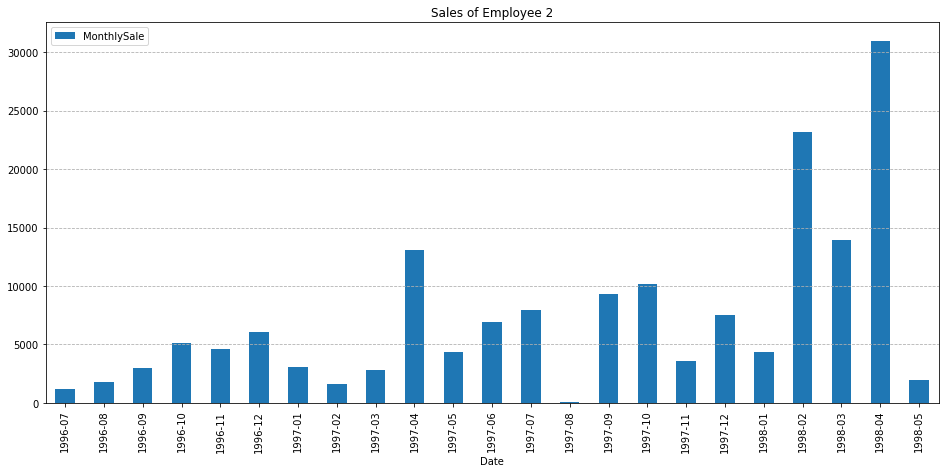

In [4]:
conn_string = """Driver=ODBC Driver 17 for SQL Server;
              Server=.\LENOVOSQLEXPRESS;
              Database=Northwind;
              Trusted_Connection=yes;"""

conn = pyodbc.connect(conn_string)

SQL_statement = """
                SELECT  DATEFROMPARTS(YEAR(o.OrderDate), MONTH(o.OrderDate), 1) AS Date,
                        SUM((od.UnitPrice * od.Quantity) * (1 - od.Discount)) AS MonthlySale
                  FROM  Orders AS o
                  JOIN  [Order Details] AS od
                    ON  o.OrderID = od.OrderID
                 WHERE  o.EmployeeID = ?
              GROUP BY  DATEFROMPARTS(YEAR(o.OrderDate), MONTH(o.OrderDate), 1)
              ORDER BY  Date;
                
                """
employee_id = int(input('Employee ID: '))

df = pd.read_sql(SQL_statement, conn, params=[employee_id], index_col='Date')

ax = df.plot(kind='bar', y='MonthlySale', figsize=(16,7))
ax.set_xticklabels([date.strftime("%Y-%m") for date in df.index])

ax.grid(axis='y', ls='--')

ax.set_title(f"Sales of Employee {employee_id}")
plt.show()